# Enunciado del problema:

Así pues tenemos una muestra de cadenas de caracteres la cual, por hipótesis, están ordenadas siguiendo un alfabeto. Y lo que se quiere discriminar es si se puede deducir de forma única el orden de los caracteres aplicados en dicho alfabeto.

Partamos del ejemplo:

```
dad
bad
cab
cda
```

De este se pueden deducir:
* dad<bad $\Rightarrow$ d<b
* bad<cab $\Rightarrow$ b<c
* cab<cda $\Rightarrow$ a<d

Luego : a<d<b<c

Si dibujamos el digrafo con un vertice por cada relacción obtenida:

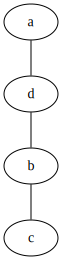

In [3]:
import graphviz


dot_graph = '''digraph{d->b;b->c;a->d}'''

# remove the display(...)

graphviz.Source(dot_graph)


Se observa facilmente la existencía de un único orden.

en cambio con:
```
ab
bc
```

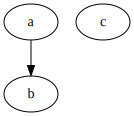

In [14]:
dot_graph = '''digraph{a->b;c;}'''

graphviz.Source(dot_graph)

Es fácil ver que hay varios órdenes posibles (a>b>c, a>c>b,c>b>a).

Por supuesto no todas las opciones posibles disponen de un orden posible si bien esto va en contra de las hipótesis del programa.

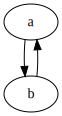

In [15]:
dot_graph = '''digraph{a->b;b->a;}'''

graphviz.Source(dot_graph)

Este orden asignado a un grafo es el denominado orden topológico:

```Una ordenación topológica (topological sort, topological ordering, topsort o toposort en inglés) de un grafo acíclico G dirigido es una ordenación lineal de todos los nodos de G que conserva la unión entre vértices del grafo G original. La condición que el grafo no contenga ciclos es importante, ya que no se puede obtener ordenación topológica de grafos que contengan ciclos.```[https://es.wikipedia.org/wiki/Ordenamiento_topol%C3%B3gico]


Así pues una solución del problema consisitirá en montar el grafo asociado a cada caso y comprobar si el orden topológico es único.

In [16]:
def get_grafo(enunciado):
    pass

def orden_unico(grafo):
    pass

def main(file):
    it=open(file,'r')
    for s in range(eval(next(it))):
        lines_problem=next(it)
        enunciado=''
        for _ in range(lines_problem):
            enunciado+=next(it)

Para componer formalizar el grafo nos basamos en el orden alfanumérico:

*$
{\displaystyle \forall [a_{1}\dots a_{m}],[b_{1}\dots b_{n}]\in \Sigma ^{*}\backslash \{\epsilon \}:[a_{1}\dots a_{m}]\leq [b_{1}\dots b_{n}]\Leftrightarrow a_{1}<b_{1}\vee (a_{1}=b_{1}\wedge [a_{2}\dots a_{m}]\leq [b_{2}\dots b_{n}])} {\displaystyle \forall [a_{1}\dots a_{m}],[b_{1}\dots b_{n}]\in \Sigma ^{*}\backslash \{\epsilon \}:[a_{1}\dots a_{m}]\leq [b_{1}\dots b_{n}]\Leftrightarrow a_{1}<b_{1}\vee (a_{1}=b_{1}\wedge [a_{2}\dots a_{m}]\leq [b_{2}\dots b_{n}])}$

Traduciendolo en python:

In [45]:
def lexicograf(a,b,orden):
    if a[0]==b[0]:
        return lexicograf(a[1:],b[1:],orden)
    else:
        return orden(a[0],b[0])

In [46]:
lexicograf('sdfsd','sdfdf',lambda x,y:(x,y))

('s', 'd')

la misma función se puede usar:

In [48]:
def get_grafo(lines):
    edges = []
    for i in range(len(lines)-1):
        a,b= lines[i],lines[i+1]#a<b
        edges.append(lexicograf(a,b,lambda x,y:(x,y))      )
    return edges

In [49]:
get_grafo('''dad
bad
cab
cda'''.split('\n'))

[('d', 'b'), ('b', 'c'), ('a', 'd')]